In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('orders.csv', parse_dates=['running_time', 'completed_time'])

<AxesSubplot:xlabel='delta_time', ylabel='Density'>

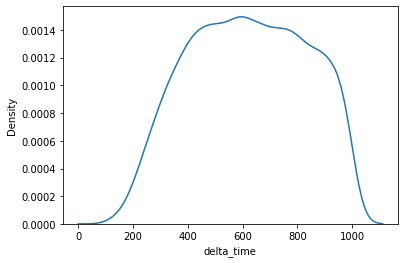

In [3]:
sns.kdeplot(df['delta_time'])

<AxesSubplot:xlabel='route_distance_km', ylabel='Density'>

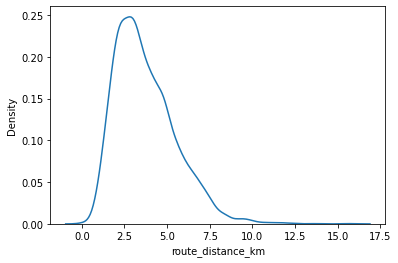

In [4]:
sns.kdeplot(df['route_distance_km'])

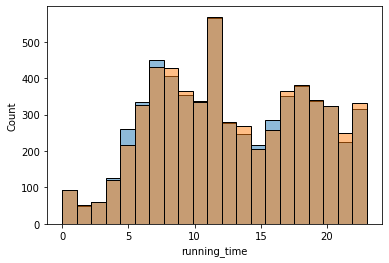

In [5]:
ax = sns.histplot(pd.DatetimeIndex(df['running_time']).hour, alpha = 0.5)
sns.histplot(pd.DatetimeIndex(df['completed_time']).hour,alpha = 0.5, ax = ax)
plt.show()

In [6]:
nodes_df = pd.read_csv('nodes.csv')

In [7]:
nodes_df_group = nodes_df.groupby('Id')

In [8]:
dir = {x:y for x, y in nodes_df_group}

In [9]:
def predict(id):
    vals = dir[id]
    return (vals['distance'] / vals['speed']).sum() * 3.6

In [10]:
id = df['Id'][0]

In [11]:
id

7013180891535596072

In [12]:
df['delta_time'][0]

595.0

In [13]:
predicted_time = [predict(x) for x in df['Id'].values]

(array([ 212., 1038., 1416., 1237.,  993.,  642.,  308.,  116.,   31.,
           7.]),
 array([  21.63459795,  122.69642995,  223.75826194,  324.82009394,
         425.88192593,  526.94375793,  628.00558992,  729.06742192,
         830.12925391,  931.19108591, 1032.2529179 ]),
 <BarContainer object of 10 artists>)

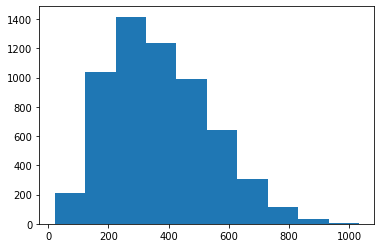

In [14]:
fig, ax = plt.subplots()

ax.hist(predicted_time)


(array([ 52., 300., 558., 723., 774., 784., 778., 754., 680., 597.]),
 array([111. , 199.8, 288.6, 377.4, 466.2, 555. , 643.8, 732.6, 821.4,
        910.2, 999. ]),
 <BarContainer object of 10 artists>)

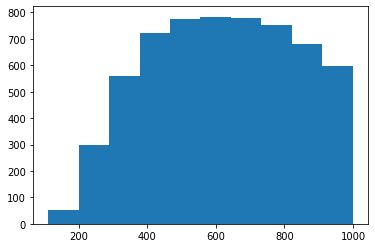

In [15]:
plt.hist(df['delta_time'])

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
np.sqrt(mean_squared_error(df['delta_time'], predicted_time))

287.79157663366186

In [18]:
dummy_mean = df['delta_time'].median()
np.sqrt(mean_squared_error(df['delta_time'], [dummy_mean] * len(df)))

211.44367729177117

In [19]:
vals = [(predicted_time[i], df['delta_time'].values[i]- predicted_time[i]) for i in range(len(predicted_time))]

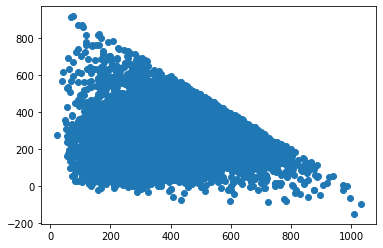

In [20]:
plt.scatter(x = [x for (x, y) in vals], y = [y for (x,y) in vals])

In [21]:
len(vals)

6000

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [112]:
X = pd.DataFrame(
    {
        'RE':predicted_time, 
        'Hour' :pd.DatetimeIndex(df['running_time']).hour}, 
        'X_start' :  
        'Y_start' : 
        'X_end' : 
        'Y_end' : )
y = df['delta_time'] - predicted_time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor


<AxesSubplot:ylabel='Count'>

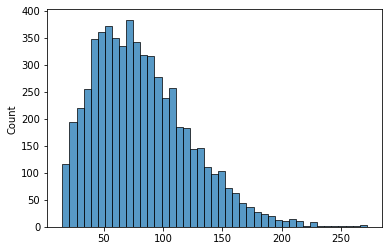

In [23]:
def thing(id):
    return len(dir[id])

sns.histplot([thing(x) for x in df['Id']])

In [24]:
all_roads = [(x,y) for (x, y) in zip(nodes_df['node_start'], nodes_df['node_finish'])]
unique_roads = list(set(all_roads))


In [25]:
arr = {x : 0 for x in unique_roads}
for a in all_roads:
    arr[a] += 1


(array([15882.,  3183.,  1833.,  1383.,   820.,   980.,   760.,   599.,
          581.,   437.]),
 array([ 1. ,  5.8, 10.6, 15.4, 20.2, 25. , 29.8, 34.6, 39.4, 44.2, 49. ]),
 <BarContainer object of 10 artists>)

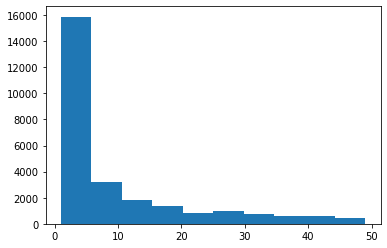

In [26]:
plt.hist([x for x in arr.values() if x < 50])

In [27]:
len([x for x in arr.values() if x < 2])

8676

In [156]:
from pyrosm import OSM
odessa = OSM('odessa_oblast-latest.osm.pbf')
nodesFromOSM,edges = odessa.get_network(nodes=True, network_type='driving')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyrosm/utils/__init__.py:8: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged

In [166]:
edges.columns

Index(['access', 'area', 'bicycle', 'bridge', 'cycleway', 'foot', 'footway',
       'highway', 'int_ref', 'junction', 'lanes', 'lit', 'maxspeed',
       'motorcar', 'motorroad', 'motor_vehicle', 'name', 'oneway',
       'overtaking', 'passing_places', 'psv', 'ref', 'service', 'sidewalk',
       'smoothness', 'surface', 'tracktype', 'tunnel', 'width', 'id',
       'timestamp', 'version', 'tags', 'osm_type', 'geometry', 'u', 'v',
       'length'],
      dtype='object')

In [185]:
good_cols = ['smoothness', 'highway', 'lanes', 'surface']

In [180]:
edges_df = pd.DataFrame(edges)

In [192]:
ans = 1
for val in good_cols:
    ans += len(edges_df[val].value_counts())
print(ans)

67


In [225]:
def g(arr):
    if len(arr) < 20:
        return arr + [np.nan] * (20 - len(arr))
    return arr[:20]
rofl_data = [g(list(set(edges_df[x].values) | {np.nan})) for x in good_cols]


In [226]:
rofl_data = np.array(rofl_data).reshape(20, 4)

In [249]:

transformer = OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist').fit(rofl_data)


def f(id1, id2):
    good = edges_df[(edges_df['u'] == id1) & (edges_df['v'] == id2)]
    if len(good) < 1:
        id1, id2 = id2, id1
        good = edges_df[(edges_df['u'] == id1) & (edges_df['v'] == id2)]

    if len(good) < 1:            
        val = np.array([None] * 4)
    else:
        val = good[good_cols].to_numpy()[0]
    return transformer.transform(val.reshape(1, -1))


def get_order_info(id):
    ans = np.array(list(map(lambda x : f(*x), dir[id][['node_start', 'node_finish']].to_numpy())))
    return ans.sum(axis = 0).flatten()


In [250]:
X_augment = [get_order_info(x) for x in df['Id']]

In [234]:
len(transformer.get_feature_names_out())

62

In [28]:
import osmapi as osm
api = osm.OsmApi()

def get_coord(node_id):
    try:
        ray = api.NodeGet(node_id)
    except:
        return None
    return (ray['lon'], ray['lat'])

In [29]:
start_pts = {}
end_pts = {}
bad = []
for i, (key, col) in enumerate(nodes_df_group):
    z1, z2 = col['node_start'].values[0], col['node_finish'].values[-1]
    start_pts[key] = z1
    end_pts[key] = z2

In [51]:
vals = list(start_pts.values()) + list(end_pts.values())

ans = []
for i in vals:
    try:
        ans.append(api.NodeGet(i))
    except: 
        ans.append(None)

In [52]:
start_coords = [(ray['lon'], ray['lat']) for ray in ans[:6000] if ray is not None else None]
end_coords = [(ray['lon'], ray['lat']) for ray in ans[6000:] if ray is not None else None]

TypeError: 'NoneType' object is not subscriptable

In [54]:
len([x for x in ans if not x is None])

11597

In [65]:
res = list(map(lambda x: [None, None] if x is None else [x['lat'], x['lon']], ans))

In [66]:
start_coords = np.array(res[:6000])
end_coords = np.array(res[6000:])

In [64]:
start_coords

[[46.4870066, 30.7329909],
 [46.481606, 30.7322459],
 [46.4624727, 30.7455146],
 [46.4684401, 30.7396111],
 None,
 [46.485215, 30.722006],
 [46.4725074, 30.7413197],
 [46.4233564, 30.7468682],
 [46.4684401, 30.7396111],
 [46.4924172, 30.7139329],
 [46.4685241, 30.7382746],
 [46.4684401, 30.7396111],
 [46.4489792, 30.7331369],
 [46.4730633, 30.6561417],
 [46.4697579, 30.7367331],
 [46.4002626, 30.7324964],
 [46.4624727, 30.7455146],
 [46.4002626, 30.7324964],
 [46.4890082, 30.7198605],
 None,
 [46.4242154, 30.7050349],
 [46.4601851, 30.6892894],
 [46.4684401, 30.7396111],
 [46.4883667, 30.7235889],
 [46.4759731, 30.7497263],
 [46.4718364, 30.7308988],
 [46.4061894, 30.7104919],
 [46.4843, 30.7204563],
 [46.477339, 30.7316602],
 [46.4183977, 30.7333802],
 [46.4702214, 30.7532757],
 [46.4396071, 30.7572752],
 None,
 [46.4739249, 30.7553636],
 [46.4629781, 30.7273316],
 [46.4061894, 30.7104919],
 [46.4358217, 30.7592109],
 [46.4684401, 30.7396111],
 [46.3910435, 30.7234687],
 [46.5773501, 

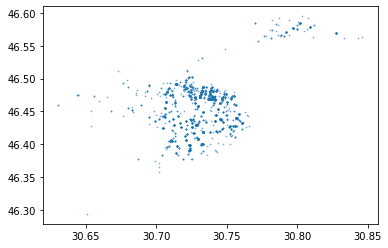

In [173]:
fig, ax = plt.subplots()
ax.scatter([x for (x,y) in start_pts], [y for (x,y) in start_pts], alpha = 0.5, s = 0.6)
#ax.scatter([x for (x,y) in end_pts], [y for (x,y) in end_pts], c = 'r', alpha=0.5, s = 0.6)


In [181]:
ids = df['Id'].values

In [67]:
X = pd.DataFrame({ \
    'RE': predicted_time, 
    'Hour' :pd.DatetimeIndex(df['running_time']).hour, 
    'X_start' : start_coords[:, 0],
    'Y_start' : start_coords[:, 1],
    'X_end' : end_coords[:, 0],
    'Y_end' : end_coords[:, 1] })
y = df['delta_time'] - predicted_time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [79]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import KBinsDiscretizer


model = make_pipeline( SimpleImputer(),KBinsDiscretizer(), RidgeCV()).fit(X_train, y_train)
mpr = model.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, mpr)))

138.4061326514099


In [90]:
import xgboost as xgb


params = {
    'xgbregressor__n_estimators' : [10, 20, 40, 80],
    'xgbregressor__max_depth' : [4, 8, 16, 32],
}

from sklearn.model_selection import GridSearchCV



model = GridSearchCV(
    make_pipeline( SimpleImputer(),KBinsDiscretizer(256), xgb.XGBRegressor(n_estimators = 20, objective="reg:squarederror")), 
    params).fit(X_train, y_train)
mpr = model.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, mpr)))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 ar

136.8868522289232


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 ar

In [83]:
model.steps

[('simpleimputer', SimpleImputer()),
 ('kbinsdiscretizer', KBinsDiscretizer()),
 ('xgbregressor',
  XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=20, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...))]

In [91]:
X.to_csv('data.csv')

In [93]:
y.to_csv('labels.csv')

In [95]:
rename = {}


In [98]:

vals = np.unique(np.concatenate((nodes_df['node_finish'].values,nodes_df['node_start'].values)))

for i in range(0, len(vals), 20):
    try:
        z = api.NodesGet(vals[i:i+20])
        for i in vals[i:i+20]:
            rename[i] = (z[i]['lat'], z[i]['lon'])
    except: 
        ans.append(None)

In [99]:
len(vals)

19818

In [100]:
len(rename)

16264

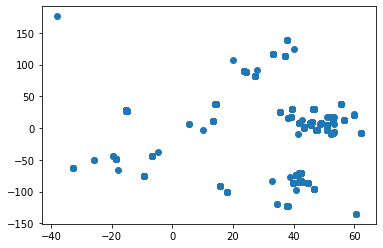

In [129]:
plt.scatter([x for x,y in list(rename.values())], [y for x,y in list(rename.values())])

In [131]:
ll = list(rename.values())

In [142]:
i = [i for i in range(len(ll)) if ll[i][0] < 0][0]

In [144]:
list(rename.keys())[i]

8952286661

In [150]:
def good(z,l,r):
    return l < z and z < r
newrename = {x:y for x,y in zip(rename.keys(), rename.values()) if good(y[1], 30, 31) and good(y[0], 46, 47)}

In [153]:
np.save('allnodes', newrename)